# MMG

In [1]:
import _init_paths
import tensorflow as tf
import numpy as np
from dataset.Dummy import Dummy
from models.CRG import CRG
from models.MMG import MMG
from models.RRG import RRG
from dataset.campus import *

KeyboardInterrupt: 

In [ ]:
# Architecture parameters
# MMG
mmg_hidden_dim = [256, 128, 64]
mmg_output_dim = 1

In [ ]:
campus_dataset = Campus('../../data/Campus/node_features.pkl', '../../data/Campus/edge_features.pkl', '../../data/Campus/GT_graphs.pkl')
node_features, adjacency, edge_features, gt_graphs = campus_dataset._generate_graphs()
adjacency= adjacency[0:400]
node_features=node_features[0:400]
edge_features=edge_features[0:400]
gt_graphs=gt_graphs[0:400]

adjacency=tf.cast(adjacency,tf.float32)
node_features=tf.cast(node_features,tf.float32)
edge_features=tf.cast(edge_features,tf.float32)
gt_graphs = tf.cast(gt_graphs,tf.float32)

print(adjacency.shape)
print(node_features.shape)
print(edge_features.shape)
print(gt_graphs.shape)

(400, 9, 9)
(400, 9, 512)
(400, 9, 9, 1)
(400, 9, 9, 1)


In [ ]:
# Architecture Init
mmg_model = MMG(mmg_hidden_dim, mmg_output_dim)

In [ ]:
EPOCHS = 10
loss = []
for epoch in range(EPOCHS):
    r_seed = np.random.randint(0, 10000)
    adjacency = tf.random.shuffle(adjacency, seed=r_seed)
    node_features = tf.random.shuffle(node_features, seed=r_seed)
    edge_features = tf.random.shuffle(edge_features, seed=r_seed)
    gt_graphs = tf.random.shuffle(gt_graphs, seed=r_seed)
    for k in range(0,390,10):
        a_sparse= tf.sparse.from_dense(adjacency[k:k+10])
        n_features=node_features[k:k+10]
        e_features=edge_features[k:k+10]
        g_graphs=gt_graphs[k:k+10]
        loss_e = mmg_model.train_step([a_sparse, n_features, e_features], g_graphs)
    loss.append(loss_e)

In [ ]:
import matplotlib.pyplot as plt 

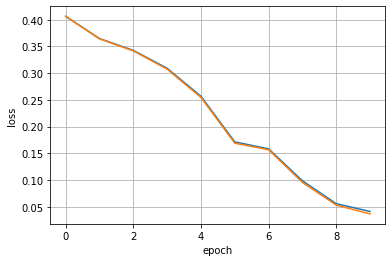

In [ ]:
fig, ax = plt.subplots()
ax.plot(loss)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.grid()